# Assignment 4: Transfer learning

The goal of this assignment is to demonstrate a technique called transfer learning. Transfer learning is a good way to quickly get good performance on the Patch-CAMELYON benchmark.

### Peliminaries

Transfer learning is a technique where instead of random initialization of the parameters of a model, we use a model that was pre-trained for a different task as the starting point. The two ways by which the pre-trained model can be transferred to the new task is by fine-tuning the complete model, or using it as a fixed feature extractor on top of which a new (usually linear) model is trained. For example, we can take a neural network model that was trained on the popular [ImageNet](http://www.image-net.org/) dataset that consists of images of objects (including categories such as "parachute" and "toaster") and apply it to cancer metastases detection.

This technique is explained in more detail in the following [video](https://www.youtube.com/watch?v=yofjFQddwHE) by Andrew Ng:


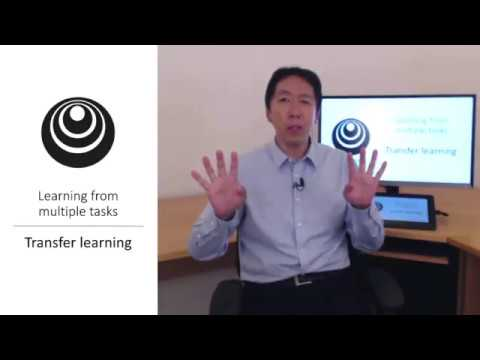

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('yofjFQddwHE')

If you are curious about different pre-training that you can use, you might want to have a look at [this paper]( https://arxiv.org/abs/1810.05444).


### Fine-tuning a pre-trained model

*Note that the code blocks below are only illustrative snippets from* `transfer.py` *and cannot be executed on their own within the notebook.*

An example of fine tuning a model is given in the `transfer.py` file. This example is very similar to the convolutional neural network example from the third assignments, so we will just highlight the differences.

The Keras library includes quite a few pre-trained models that can be used for transfer learning. The examples uses the MobileNetV2 model that is described in details [here](https://arxiv.org/abs/1801.04381). This architecture is targeted for use on mobile devices. We chose it for this example since it is "lightweight" and it can be relatively efficiently trained even on the CPU.

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In addition to the model, we also import the associated preprocessing function that is then used in the generator function instead of the rescale-only preprocessing used in the CNN example:

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

The code snippet below shows how to initialize the MobileNetV2 model for fine-tuning on the Patch-CAMELYON dataset. Compared to the previous examples that used the Keras Sequential API, this example uses the Keras Functional API.

In [ ]:
input = Input(input_shape)

# get the pretrained model, cut out the top layer
pretrained = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# if the pretrained model it to be used as a feature extractor, and not for
# fine-tuning, the weights of the model can be frozen in the following way
# for layer in pretrained.layers:
#    layer.trainable = False

output = pretrained(input)
output = GlobalAveragePooling2D()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output)

model = Model(input, output)

# note the lower lr compared to the cnn example
model.compile(SGD(learning_rate=0.001, momentum=0.95), loss = 'binary_crossentropy', metrics=['accuracy'])

The architecture of the model is given below. The MobileNetV2 model takes the 96x96x3 images from the Patch-CAMELYON dataset and produces 1280 feature maps of size 3x3. The feature maps are then pooled and connected to the output layer of the model (with a dropout layer in between; see Exercise 3).

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #
# =================================================================
# input_1 (InputLayer)         (None, 96, 96, 3)         0
# _________________________________________________________________
# mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984
# _________________________________________________________________
# global_average_pooling2d_1 ( (None, 1280)              0
# _________________________________________________________________
# dropout_1 (Dropout)          (None, 1280)              0
# _________________________________________________________________
# dense_1 (Dense)              (None, 1)                 1281
# =================================================================
# Total params: 2,259,265
# Trainable params: 2,225,153
# Non-trainable params: 34,112

The remainder of the code in `transfer.py` performs training (i.e. fine-tuning) of the model in much the same way as in the CNN example. One difference is that instead of training for a number of full epochs, we define "mini-epochs" that contain around 5% of the training and validation samples. Since the fine-tuning of the model converges fast (you can expect convergence in less than one epoch), this will provide more fine-grained feedback about the performance on the validation set. 

## Exercise 1

When does transfer learning make sense? Hint: watch the video. Does it make sense to do transfer learning from ImageNet to the Patch-CAMELYON dataset?


## Exercise 2

Run the example in `transfer.py`. Then, modify the code so that the MobileNetV2 model is not initialized from the ImageNet weights, but randomly (you can do that by setting the `weights` parameter to `None`). Analyze the results from both runs and compare them to the CNN example in assignment 3.

## Exercise 3

The model in `transfer.py` uses a dropout layer. How does dropout work and what is the effect of adding dropout layers the the network architecture? What is the observed effect when removing the dropout layer from this model? Hint: check out the Keras documentation for this layer.

## Submission checklist

- Exercise 1: Answers to the questions
- Exercise 2: Answers to the questions and code
- Exercise 3: Answers to the questions

### Before you start working on the main project...

As mentioned before, transfer learning is a good way to quickly get good performance on the Patch-CAMELYON benchmark. Note, however, that this is not the objectives of the course. One of the main objectives is for the students to get "insight in setting up a research question that can be quantitatively investigated". While it would certainly be nice to score high on the challenge leaderboard, it is much more important to ask a good research question and properly investigate it. You are free to choose what you want to investigate and the course instructors can give you feedback.